In [45]:
library(arrow)
library(dplyr)
library(plotly)
library(data.table)
library(ape)
library(IRanges)
library(RNOmni)
library(ggplot2)
library(hrbrthemes)
library(viridis)
library(stringr)
library(gridExtra)

In [46]:
df <- snakemake@input[[1]]
output <- snakemake@output[[1]]
# output <-  "results/boxplot_genotype_1688990_A.pdf"
variant <- str_extract(output, "ID_[0-9]+_[GATC+]")

ERROR: Error in eval(expr, envir, enclos): Objekt 'snakemake' nicht gefunden


In [5]:
# df <- read_feather('~/Documents/2023_haemophilius_gwas/hinf/results/feather/Hinf_norm_mic.feather')
df <- read_feather(df)

df$AMP_MIC <- as.numeric(df$AMP_MIC)
df$AMP_MIC.rankscaled <- RankNorm(df$AMP_MIC)
df_lm <- subset(df, select = -c(FullID, Perc.ReadsMapped, CoverageMappedReads,
                             origin, AMP, serotype, beta_lactamase, samples, AMP_MIC))
# n_variants = length(df_) -1 



In [6]:
# formula <- paste("AMP_MIC.rankscaled ~ `", variant, "`", sep="")

# model <- lm(AMP_MIC.rankscaled ~ `1688990_A`, df)
# model <- lm(formula, df_lm)

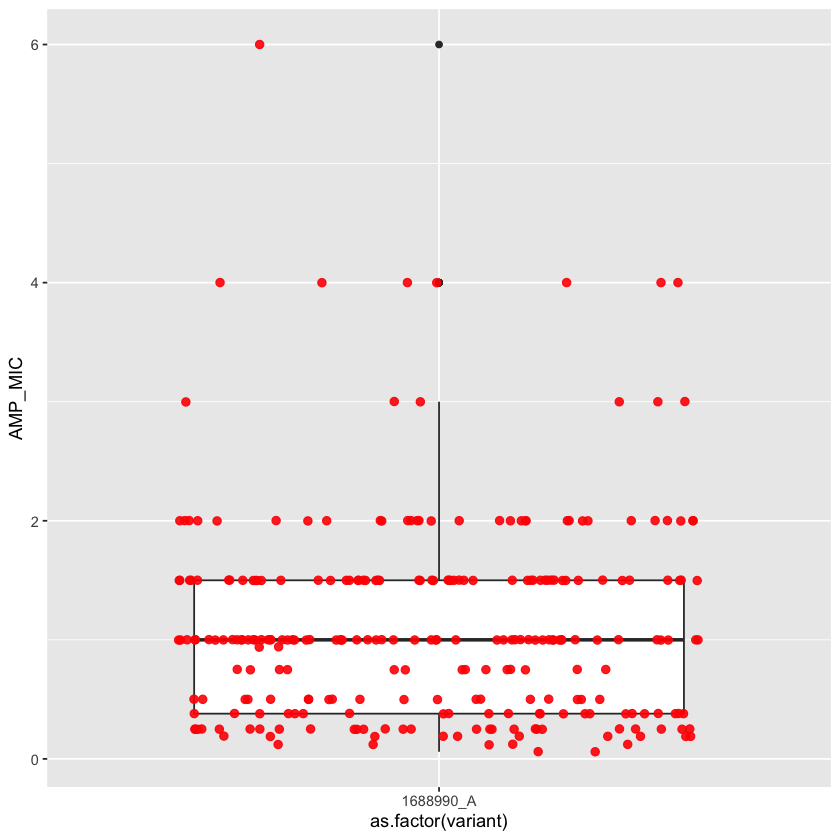

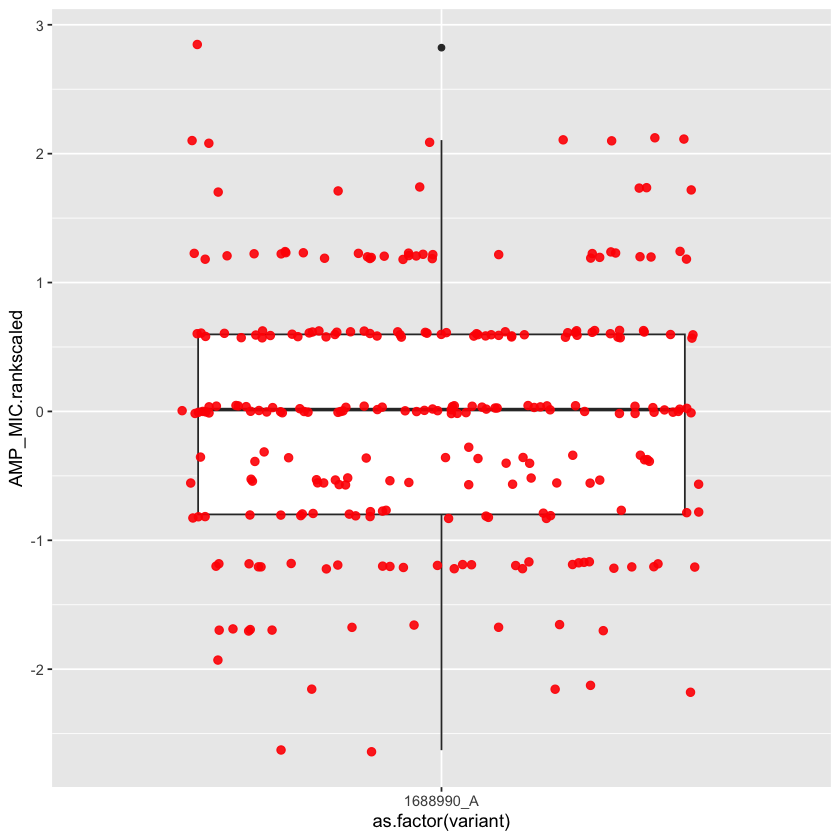

In [43]:
df_plot <- select(df, AMP_MIC.rankscaled, AMP_MIC, variant)
df_plot[[variant]] <- factor(df_plot[[variant]])

plot.rankscaled <- ggplot(data = df_plot, aes(x = get(variant), y = AMP_MIC.rankscaled)) +
                      geom_boxplot() +
                      geom_jitter(color="red", size=2, alpha=0.9)

plot.unscaled <- ggplot(data = df_plot, aes(x = get(variant), y = AMP_MIC)) +
                      geom_boxplot() +
                      geom_jitter(color="red", size=2, alpha=0.9)

plot.unscaled
plot.rankscaled

In [36]:
aspect_ratio <- 1

# filename.unscaled <- paste("boxplot_unscaled_", variant, ".pdf", sep="")
# filename.rankscaled <- paste("boxplot_rankscaled_", variant, ".pdf", sep="")
height <- 10
ggsave(output, plot.unscaled, device = "pdf", height = height , width = height * aspect_ratio)
# ggsave(filename.rankscaled, plot.rankscaled, device = "pdf", height = height , width = height * aspect_ratio)